In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.xkcd()

## Result for DPDK forwarding, Linux syscall sending / receiving

In [13]:
syscall_syscall = pd.read_csv("syscall-syscall.csv")
syscall_dpdk = pd.read_csv("syscall-dpdk.csv")

def transform(df):
  df["time"] /= 1000
  time_step = df["time"][1] - df["time"][0]
  df["time"] = pd.to_timedelta(df["time"], unit="s")
  df.set_index("time", inplace=True)
  df["tx_packets"] /= time_step
  df["rx_packets"] /= time_step
  df = df.resample("1S", origin="start").mean()
  return df

syscall_syscall = transform(syscall_syscall)
syscall_dpdk = transform(syscall_dpdk)

Text(0.5, 1.0, 'Drop rate')

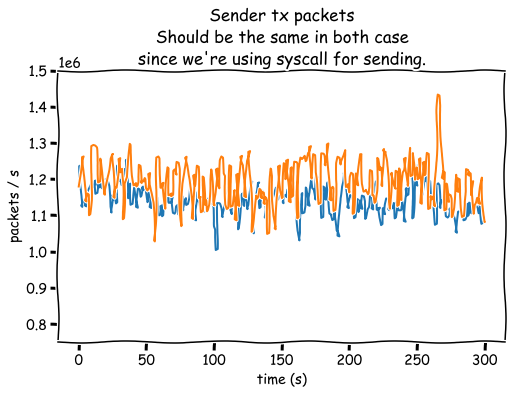

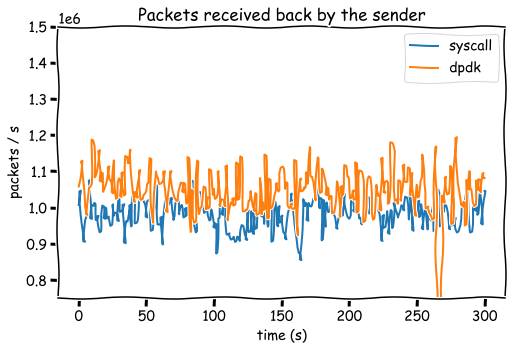

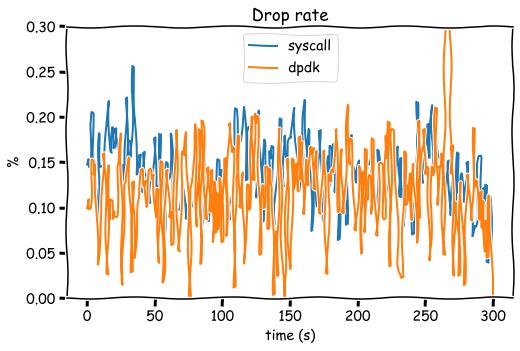

In [14]:
# plot packet stats
lims = (0.75e6, 1.5e6)

fig = plt.figure(figsize=(8, 5))
plt.plot(syscall_syscall.index.seconds, syscall_syscall["tx_packets"], label="syscall")
plt.plot(syscall_syscall.index.seconds, syscall_dpdk["tx_packets"], label="dpdk")
plt.ylabel("packets / s")
plt.xlabel("time (s)")
plt.ylim(lims)
plt.title("Sender tx packets\nShould be the same in both case\nsince we're using syscall for sending.")

fig = plt.figure(figsize=(8, 5))
plt.plot(syscall_syscall.index.seconds, syscall_syscall["rx_packets"], label="syscall")
plt.plot(syscall_syscall.index.seconds, syscall_dpdk["rx_packets"], label="dpdk")
plt.ylabel("packets / s")
plt.xlabel("time (s)")
plt.ylim(lims)
plt.legend()
plt.title("Packets received back by the sender")

fig = plt.figure(figsize=(8, 5))
plt.plot(syscall_syscall.index.seconds, syscall_syscall["drop_rate"], label="syscall")
plt.plot(syscall_syscall.index.seconds, syscall_dpdk["drop_rate"], label="dpdk")
plt.ylabel("%")
plt.xlabel("time (s)")
plt.ylim(0, 0.3)
plt.legend()
plt.title("Drop rate")

Text(0.5, 1.0, 'Average latency')

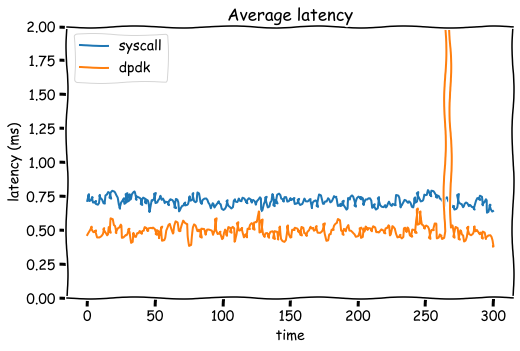

In [15]:
# Plot latency
lims = (0, 2)

fig = plt.figure(figsize=(8, 5))
plt.plot(syscall_syscall.index.seconds, syscall_syscall["avg_latency"], label="syscall")
plt.plot(syscall_syscall.index.seconds, syscall_dpdk["avg_latency"], label="dpdk")
plt.ylabel("latency (ms)")
plt.ylim(lims)
plt.xlabel("time")
plt.legend()
plt.title("Average latency")